In [1]:
import utility_common as common
from utility_dfcutter import *
from torch_model import *

In [2]:
X = tc.from_numpy( np.load(common.getBaseDirectory() + "data/templates/templatesX_{}.npy".format('')) ).type(tc.FloatTensor)
#Y = tc.from_numpy( np.load(common.getBaseDirectory() + "data/templates/templatesY_{}.npy".format('')) ).type(tc.FloatTensor)
Y = tc.sum(X,1)

In [3]:
model     = PredictiveModel()
optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.001) 

In [4]:
epoch = 0
while True:
    y,regu = model.forward(X)
    loss = tc.sum( (y-Y)**2/Y ) + regu
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()
    
    # calculate the update
    params = dict(model.named_parameters())
    bwe = params['layer_beta.bwe'].data
    bwm = params['layer_beta.bwm'].data
    bwt = params['layer_beta.bwt'].data
    if epoch > 0:
        if (tc.abs(bwe-bwe0)<1e-6) and (tc.abs(bwm-bwm0)<1e-6) and (tc.abs(bwt-bwt0)<1e-6):
            break
            
    bwe0,bwm0,bwt0 = bwe,bwm,bwt
    epoch += 1
    
    
print(bwe,bwm,bwt)

tensor(0.1074) tensor(0.1074) tensor(0.1081)


In [5]:
# for name, param in model.named_parameters():
#     if param.requires_grad:
#         print(name,param.data)

In [6]:
hess = calculate_hessian(loss, model)
hessinv = np.linalg.inv(hess)
sigmasq = hessinv.diagonal()
sigma   = np.sqrt(sigmasq)
corvar  = hessinv/np.outer(sigma, sigma)

/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


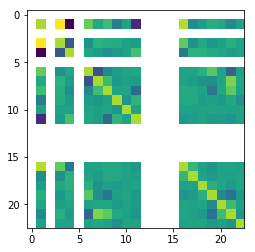

In [7]:
plt.imshow(corvar)

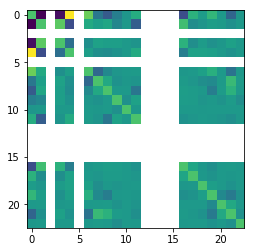

In [56]:
def calculate_hessian(loss, model):
    var = model.parameters()
    temp = []
    grads = torch.autograd.grad(loss, var, create_graph=True)
    grads = torch.cat([g.view(-1) for g in grads])
    
    for g in grads:
        grad2 = torch.autograd.grad(g, var, create_graph=True)
        for i in grad2:
            i = i.data.numpy()
        temp.append(grad2)
    return np.array(temp)


array([], shape=(23, 0), dtype=float64)

In [31]:

    print(grad2)

(tensor(94660848., grad_fn=<ThAddBackward>), tensor(-2704439., grad_fn=<ThAddBackward>), tensor(2928155., grad_fn=<ThAddBackward>), tensor(711529.5625, grad_fn=<ThAddBackward>), tensor(124957.1094, grad_fn=<ThAddBackward>), tensor(386957.7500, grad_fn=<ThAddBackward>), tensor(9074898., grad_fn=<ThAddBackward>), tensor(374166.1250, grad_fn=<ThAddBackward>), tensor(208687.4688, grad_fn=<ThAddBackward>), tensor(216848.3125, grad_fn=<ThAddBackward>), tensor(7305.7886, grad_fn=<ThAddBackward>), tensor(110127.5938, grad_fn=<ThAddBackward>), tensor(9995709., grad_fn=<ThAddBackward>), tensor(12631351., grad_fn=<ThAddBackward>), tensor(521181.4688, grad_fn=<ThAddBackward>), tensor(250086.7969, grad_fn=<ThAddBackward>), tensor(21161.5742, grad_fn=<ThAddBackward>), tensor(-1130.0488, grad_fn=<ThAddBackward>), tensor(2530.7024, grad_fn=<ThAddBackward>), tensor(153565.5312, grad_fn=<ThAddBackward>), tensor(475.2518, grad_fn=<ThAddBackward>), tensor(223219.0781, grad_fn=<ThAddBackward>), tensor(6592

(tensor(9995709., grad_fn=<ThAddBackward>), tensor(15162215., grad_fn=<ThAddBackward>), tensor(203578., grad_fn=<ThAddBackward>), tensor(98141.7578, grad_fn=<ThAddBackward>), tensor(142867.9844, grad_fn=<ThAddBackward>), tensor(143412.6250, grad_fn=<ThAddBackward>), tensor(2930443.7500, grad_fn=<ThAddBackward>), tensor(116457.2891, grad_fn=<ThAddBackward>), tensor(86951.9375, grad_fn=<ThAddBackward>), tensor(58761.2539, grad_fn=<ThAddBackward>), tensor(1743.8314, grad_fn=<ThAddBackward>), tensor(74388.4453, grad_fn=<ThAddBackward>), tensor(3160971.5000, grad_fn=<ThAddBackward>), tensor(1517630.8750, grad_fn=<ThAddBackward>), tensor(2241626., grad_fn=<ThAddBackward>), tensor(85887.4297, grad_fn=<ThAddBackward>), tensor(2654.4648, grad_fn=<ThAddBackward>), tensor(2049.0500, grad_fn=<ThAddBackward>), tensor(860.8302, grad_fn=<ThAddBackward>), tensor(55907.4727, grad_fn=<ThAddBackward>), tensor(914.9993, grad_fn=<ThAddBackward>), tensor(69797.1250, grad_fn=<ThAddBackward>), tensor(2235.431

In [53]:
grad2[0].data.numpy()

array(6592.7163, dtype=float32)

In [54]:
temp = []
grads = grad(loss, model.parameters(), create_graph=True)
grads = torch.cat([g.view(-1) for g in grads])

for g in grads:
    grad2 = grad(g, model.parameters(), create_graph=True)
    temp.append(grad2)

TypeError: 'Tensor' object is not callable

In [50]:
    #grads = grad(loss, model.parameters(), create_graph=True)[0]
    for grd in grads:
        print(grd)
        
        
        

TypeError: iteration over a 0-d tensor

In [8]:
from pathlib import Path

In [9]:
home = str(Path.home())

In [10]:
home

'/Users/zihengchen'